In [2]:
import os
import pandas as pd
from io import BytesIO 
import matplotlib.pyplot as plt
import base64
import seaborn as sns
import numpy as np

In [63]:



df = pd.read_excel("data.xlsx", skiprows=[1])
ph_no = df['Location'].unique()[0]
print(ph_no)
df.drop(columns=['Location', 'Machine Code', 'Trx Status', 'Staff Phone', 'Customer ID', 'Is Dawaa Insurance', 'Is Insurance Approval', 'Insurance Approval', 'Insurance Type', 'Nphies Action Type', 'Nphies Member Id', 'Nphies Auth Id', 'Indirect Customer',  'Items', 'Item Lines Count', 'Payment Lines Count', 'Gross Value', 'Supervisor', 'Senior', 'District', 'Region', 'POS Version'] , inplace=True)
df = df.where(pd.notnull(df),None)
print(df.head(10))

P0175
   Receipt Number Order No  DeliveryNo  Trx Month   Trx Date  \
0          699855     None         NaN 2024-12-01 2024-12-01   
1          699856     None         NaN 2024-12-01 2024-12-01   
2          699857     None         NaN 2024-12-01 2024-12-01   
3          699858     None         NaN 2024-12-01 2024-12-01   
4          699860     None         NaN 2024-12-01 2024-12-01   
5          699862     None         NaN 2024-12-01 2024-12-01   
6          699864     None         NaN 2024-12-01 2024-12-01   
7          699866     None         NaN 2024-12-01 2024-12-01   
8          699869     None         NaN 2024-12-01 2024-12-01   
9          699872     None         NaN 2024-12-01 2024-12-01   

             Trx Time Trx Type Document Type Sub Document Type  Staff ID  ...  \
0 1900-01-01 00:08:25    Sales       Regular            Others      9174  ...   
1 1900-01-01 00:11:21    Sales       Regular            Others      9174  ...   
2 1900-01-01 00:20:18    Sales       Regular  

In [6]:
print(df['Net Value'].mean())
print(df['Net Value'].sum())
print(df.shape[0])


70.76224392425824
474602.37
6707


/home/hasan/Documents/zoron/website/local/myenv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


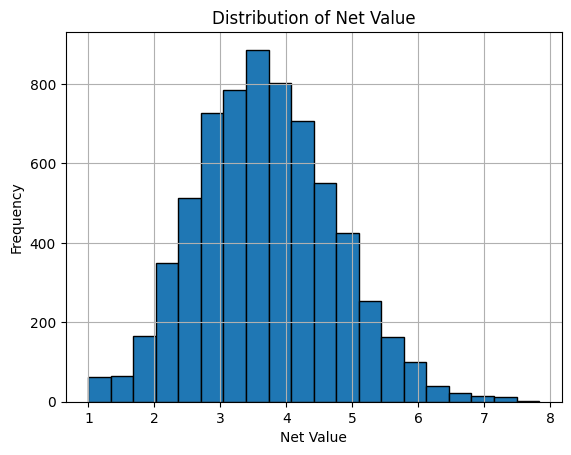

iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAACMlJREFUeJzt1jEBACAMwDDAv+fhAo4mCnp2z8wsAAAyzu8AAADeMoAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwg

<Figure size 640x480 with 0 Axes>

In [7]:


plt.figure()
df['Log Net Value'] = np.log(df['Net Value'] + 1)  # Add 1 to avoid log(0)
df['Log Net Value'].hist(bins=20 , edgecolor='black')
img = BytesIO()

plt.title('Distribution of Net Value')
plt.xlabel('Net Value')
plt.ylabel('Frequency')
plt.show()
plt.savefig(img, format='png')
# plt.close()
img.seek(0)
url = base64.b64encode(img.getvalue()).decode('utf8')
print(url)

Outliers:
 Receipt Number
699869           248.00
699875           210.36
699883           173.63
699940           273.85
699947           199.00
                 ...   
966557996640     235.25
966559668995     960.50
966563334161     428.07
966563696001    2260.20
966566064395     879.36
Name: Net Value, Length: 602, dtype: float64


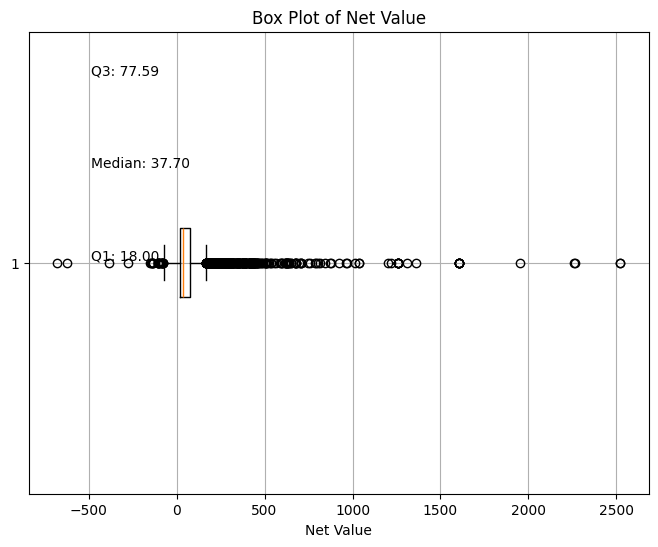

In [6]:


# Assuming df is your DataFrame and it has 'Receipt Number' and 'Net Value' columns
plt.figure(figsize=(8, 6))

# Group by 'Receipt Number' and sum 'Net Value'
data = df.groupby('Receipt Number')['Net Value'].sum()

# Create a box plot
bp = plt.boxplot(data, vert=False)

# Calculate quartiles, median, IQR, and bounds
q1, median, q3 = np.percentile(data, [25, 50, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
print("Outliers:\n", outliers)

# Annotate the plot with Q1, Median, and Q3
plt.text(0.1, 0.5, f'Q1: {q1:.2f}', transform=plt.gca().transAxes, verticalalignment='bottom')
plt.text(0.1, 0.7, f'Median: {median:.2f}', transform=plt.gca().transAxes, verticalalignment='bottom')
plt.text(0.1, 0.9, f'Q3: {q3:.2f}', transform=plt.gca().transAxes, verticalalignment='bottom')

# Add title and labels
plt.title('Box Plot of Net Value')
plt.xlabel('Net Value')
plt.grid(True)

# Show the plot
plt.show()

/tmp/ipykernel_25543/925778588.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Net Value'].resample('M').sum()


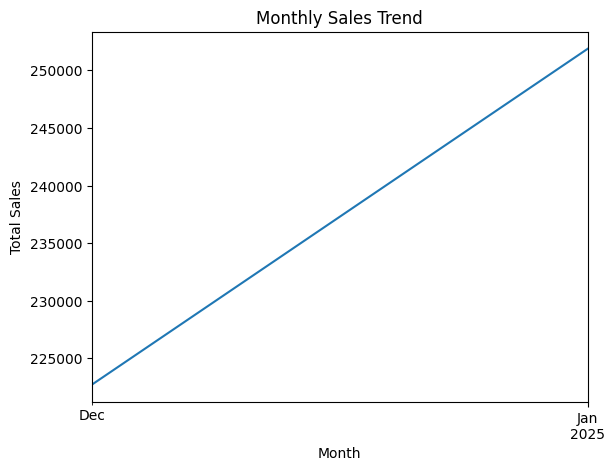

In [22]:

monthly_sales = df['Net Value'].resample('M').sum()
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [34]:
customers_sales =  df.groupby('Loyalty Customer ID')['Net Value'].agg(['sum','count','mean'])
customers_sales.reset_index()
customers_info = df[['Loyalty Customer ID', 'Loyalty Name']].drop_duplicates()
customers_sales_with_names = pd.merge(customers_sales,customers_info,on='Loyalty Customer ID',how='left')
top_customers = customers_sales_with_names.sort_values(by='sum',ascending=False)
print(top_customers.head(10))

      Loyalty Customer ID       sum  count         mean  \
2291            3795407.0  22409.74    441    50.815737   
3209           11124335.0   2712.47     16   169.529375   
1270            1019717.0   2522.80      1  2522.800000   
1018             796946.0   2412.47      3   804.156667   
2095            2807951.0   2260.20      4   565.050000   
2210            3365996.0   2253.44      6   375.573333   
583              354784.0   2085.43     12   173.785833   
1401            1164866.0   1962.61      3   654.203333   
595              370713.0   1951.88      1  1951.880000   
2906            8063913.0   1946.36      3   648.786667   

                 Loyalty Name  
2291    NON LOYALTY CUSTOMERS  
3209                  KHADIGA  
1270   Faisal Wasmi al kulaib  
1018    هاني ابراهيم العويشي   
2095        بدر علي العبدالله  
2210  ABDULAH MOBARAK ALSELEM  
583      AHMED SOUD AL GHANEM  
1401  MOHAMMED SAAD ALIBRAHIM  
595            HAMAD KHALIIFA  
2906            ايات  العبادي 

In [65]:
print(df['Staff ID'].dtype)
# Step 1: Filter out Staff ID = 3098
filter_staff = df[~df['Staff ID'].isin([3098])]

# Step 2: Group by Staff ID and calculate total Net Value
top_staff = filter_staff.groupby('Staff ID')['Net Value'].sum().reset_index()

# Step 3: Extract Staff ID and Staff Name, ensuring consistency
# Use .drop_duplicates() to keep only one Staff Name per Staff ID
staff_info = filter_staff[['Staff ID', 'Staff Name']].drop_duplicates()

# Step 4: Merge total Net Value with Staff Name
top_staff_with_names = pd.merge(top_staff, staff_info, on='Staff ID', how='left')

# Step 5: Print the result
print(top_staff_with_names)



int64
   Staff ID  Net Value                  Staff Name
0      3611  219294.81  حسن ابواليزيد الحسيني معدي
1      9174  257302.65    احمد حسن ابراهيم الدسوقى


In [15]:

loyal_customers = df[df['Loyalty Name'].notna()]
non_loyal_customers = df[df['Loyalty Name'].isna()]

print(loyal_customers['Net Value'].sum())
# print(non_loyal_customers['Net Value'].sum())
print(non_loyal_customers['Net Value'].sum())
# print(loyal_customers['Net Value'].mean())
print(loyal_customers['Net Value'].mean())
# print(non_loyal_customers['Net Value'].mean())
print(non_loyal_customers['Net Value'].mean())

579796.47
33005.94
73.91591917389087
46.6185593220339


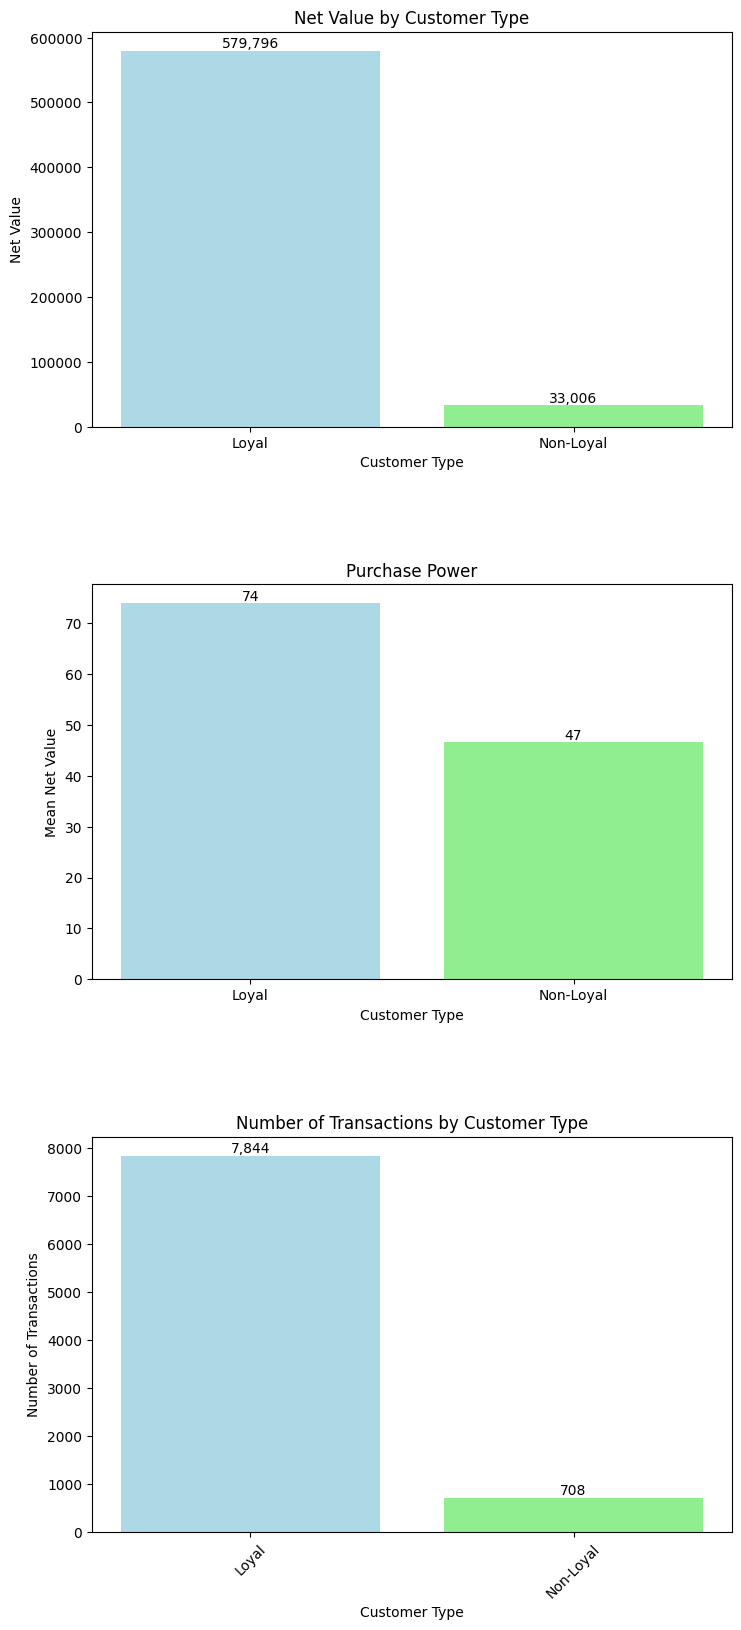

In [44]:

# Assuming the data is loaded into a DataFrame called df
# Example: df = pd.read_excel('Invoices_Summary.xlsx')

# Filter loyal and non-loyal customers
loyal_customers = df[df['Loyalty Name'].notna()]
non_loyal_customers = df[df['Loyalty Name'].isna()]

# Calculate mean net value and number of transactions
sum_net_value_loyal = loyal_customers['Net Value'].sum()
sum_net_value_non_loyal = non_loyal_customers['Net Value'].sum()
# Calculate mean net value and number of transactions
mean_net_value_loyal = loyal_customers['Net Value'].mean()
mean_net_value_non_loyal = non_loyal_customers['Net Value'].mean()

num_transactions_loyal = len(loyal_customers)
num_transactions_non_loyal = len(non_loyal_customers)

# Create a DataFrame for plotting
data = {
    'Customer Type': ['Loyal', 'Non-Loyal'],
    'Mean Net Value': [mean_net_value_loyal, mean_net_value_non_loyal],
    'Net Value': [sum_net_value_loyal, sum_net_value_non_loyal],
    'Number of Transactions': [num_transactions_loyal, num_transactions_non_loyal]
}
plot_df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(8,15))

# Plot 1: sum Net Value
bars = ax[0].bar(data['Customer Type'], data['Net Value'], color=['lightblue' , 'lightgreen'])
for bar in bars:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2 , height , f'{height:,.0f}'  ,ha='center' ,va='bottom'   )
ax[0].set_title('Net Value by Customer Type')
ax[0].set_ylabel('Net Value')
ax[0].set_xlabel('Customer Type')

# Plot 1: Mean Net Value
bars = ax[1].bar(data['Customer Type'], data['Mean Net Value'], color=['lightblue' , 'lightgreen'])
for bar in bars:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2 , height , f'{height:,.0f}'  ,ha='center' ,va='bottom'   )
ax[1].set_title('Purchase Power')
ax[1].set_ylabel('Mean Net Value')
ax[1].set_xlabel('Customer Type')

# Plot 2: Number of Transactions
bars = ax[2].bar(data['Customer Type'], data['Number of Transactions'], color=['lightblue' , 'lightgreen'])
for bar in bars:
    height = bar.get_height()
    ax[2].text(bar.get_x() + bar.get_width() / 2 , height , f'{height:,.0f}'  ,ha='center' ,va='bottom'   )
ax[2].set_title('Number of Transactions by Customer Type')
ax[2].set_ylabel('Number of Transactions')
ax[2].set_xlabel('Customer Type')
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=1.1)
#plt.tight_layout()
plt.show()

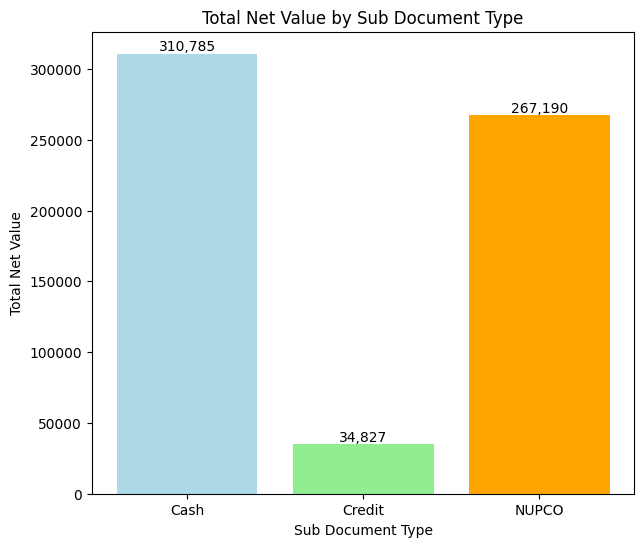

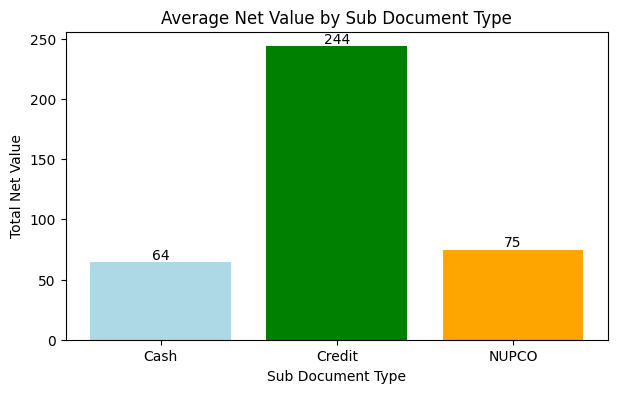

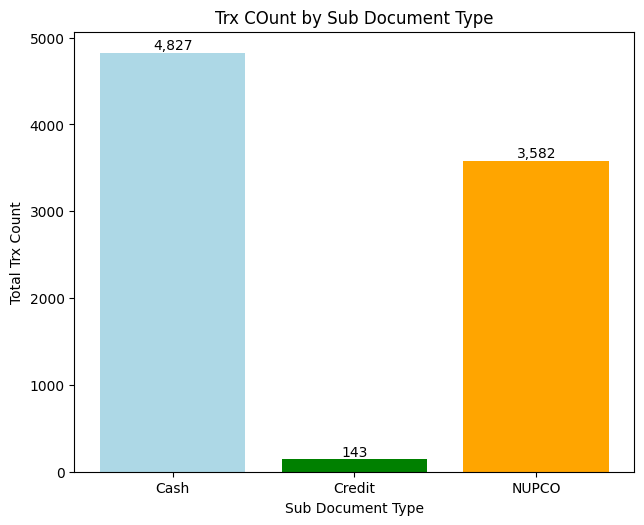

In [20]:
df['Sub Document Type'] = df['Sub Document Type'].replace({
    'NPHIES': 'Credit',
    'SABIC': 'Credit',
    'Others': 'Cash'
})
# DOCUMNET SUB TYPE
document_types = df.groupby('Sub Document Type')['Net Value'].sum()
document_types_avg = df.groupby('Sub Document Type')['Net Value'].mean()
document_types_numbers = df.groupby('Sub Document Type')['Net Value'].count()

plt.figure(figsize=(7,6))
bars = plt.bar(document_types.index , document_types.values , color=['lightblue' , 'lightgreen' , 'orange'])
for bar in bars:
    height= bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , height , f'{height:,.0f}'  ,ha='center' ,va='bottom'   )
plt.title('Total Net Value by Sub Document Type')
plt.xlabel('Sub Document Type')
plt.ylabel('Total Net Value')
plt.show()

plt.figure(figsize=(7,4))
bars2 = plt.bar(document_types_avg.index , document_types_avg.values , color=['lightblue' , 'green' , 'orange'])
for bar in bars2:
    height= bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , height , f'{height:,.0f}'  ,ha='center' ,va='bottom'   )
plt.title('Average Net Value by Sub Document Type')
plt.xlabel('Sub Document Type')
plt.ylabel('Total Net Value')
plt.show()
plt.figure(figsize=(7,4))
bars3 = plt.bar(document_types_numbers.index , document_types_numbers.values , color=['lightblue' , 'green' , 'orange'])
for bar in bars3:
    height= bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , height , f'{height:,.0f}'  ,ha='center' ,va='bottom'   )
plt.title('Trx COunt by Sub Document Type')
plt.xlabel('Sub Document Type')
plt.ylabel('Total Trx Count')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=1.3)
plt.show()

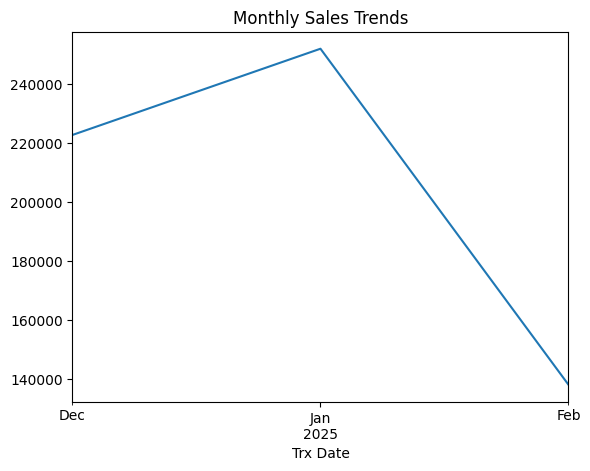

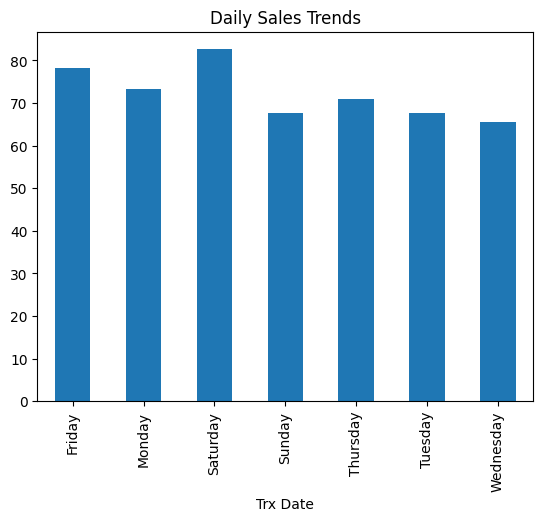

In [ ]:
# Monthly Sales Trends
monthly_sales = df.resample('ME', on='Trx Date')['Net Value'].sum()
monthly_sales.plot(title='Monthly Sales Trends')
plt.show()

# Daily Sales Trends
daily_sales = df.groupby(df['Trx Date'].dt.day_name())['Net Value'].sum()
bars = daily_sales.plot(kind='bar', title='Daily Sales Trends')
# for bar in bars:
#     height= bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2 , height , f'{height:,.0f}'  ,ha='center' ,va='bottom'   )
plt.show()

0      6
118    0
247    1
362    2
473    3
568    4
630    5
Name: Day of Week, dtype: int32


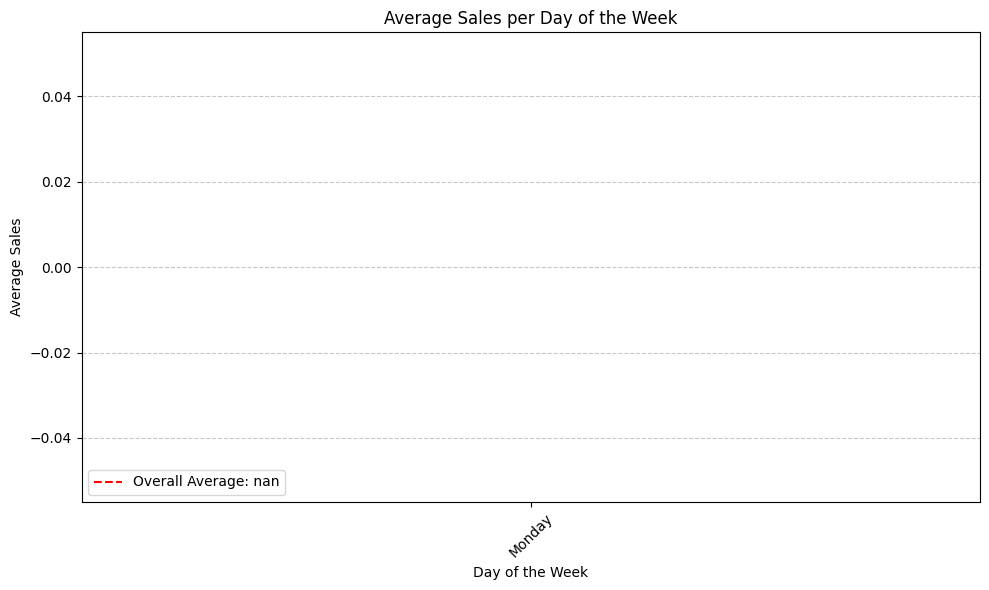

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Trx Date' is a datetime column
df['Trx Date'] = pd.to_datetime(df['Trx Date'])

# Step 1: Group by day of the week and sum sales for each day
daily_total_sales = df.groupby(df['Trx Date'].dt.day_name())['Net Value'].sum()

df['Day of Week'] = df['Trx Date'].dt.dayofweek
print(df['Day of Week'].drop_duplicates())
# Step 2: Calculate the average of these daily totals
average_sales_per_day = daily_total_sales / daily_total_sales.value_counts()

# Sort Days Chronologically
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_sales_per_day = average_sales_per_day.reindex(days_order)

# Step 3: Plot the Bar Chart
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'lightblue', 'yellow', 'lightcoral']
bars = plt.bar(average_sales_per_day.index, average_sales_per_day.values, color=colors)

# Step 4: Add Numbers Above Bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height,  # Y position (height of the bar)
        f'{height:,.0f}',  # Text to display (formatted value)
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )

# Add a Horizontal Line for Overall Average
overall_avg = average_sales_per_day.mean()  # Overall average across all days
plt.axhline(overall_avg, color='red', linestyle='--', label=f'Overall Average: {overall_avg:,.0f}')
plt.legend()

# Customize the Plot
plt.title('Average Sales per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the Plot
plt.tight_layout()
plt.show()

In [65]:

# Convert 'Trx Date' to datetime
df['Trx Date'] = pd.to_datetime(df['Trx Date'])
# Extract day of the week (Monday=0, Sunday=6)
df['Day of Week'] = df['Trx Date'].dt.dayofweek

# Map day of the week to day names
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}
df['Day Name'] = df['Day of Week'].map(day_names)

# Count the number of occurrences of each day
day_counts = df['Day Name'].value_counts().sort_index()
print(day_counts)
# Group by day of the week and calculate total sales and total transactions
daily_sales = df.groupby('Day Name')['Total Value'].sum()
daily_trx = df.groupby('Day Name').size()

# Calculate average daily sales and average number of transactions
average_daily_sales = daily_sales / day_counts
average_daily_trx = daily_trx / day_counts

# Combine the results into a DataFrame
result = pd.DataFrame({
    'Average Daily Sales': average_daily_sales,
    'Average Number of Transactions': average_daily_trx,
    'Number of Days': day_counts
})
result


Day Name
Friday        978
Monday       1375
Saturday     1354
Sunday       1393
Thursday      932
Tuesday      1245
Wednesday    1275
Name: count, dtype: int64


,Average Daily Sales,Average Number of Transactions,Number of Days
Day Name,,,
Friday,106.769315,1.0,978
Monday,97.316102,1.0,1375
Saturday,95.321521,1.0,1354
Sunday,102.206109,1.0,1393
Thursday,101.013230,1.0,932
Tuesday,91.577213,1.0,1245
Wednesday,94.927106,1.0,1275


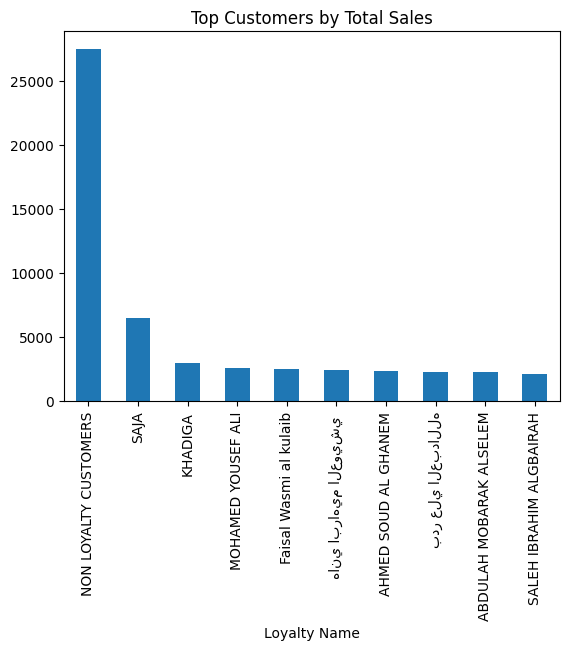

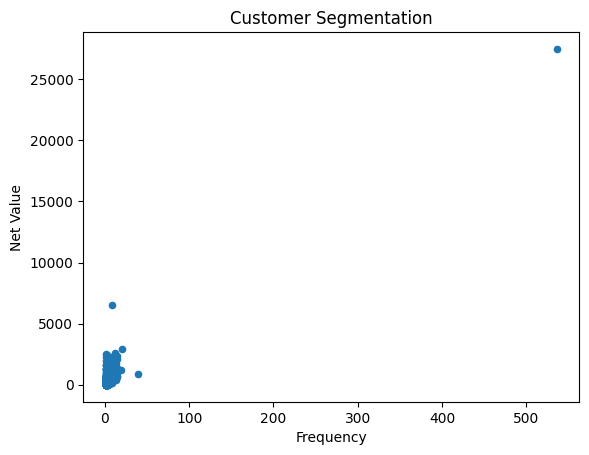

In [59]:
# Top Customers by Total Sales
top_customers = df.groupby('Loyalty Name')['Net Value'].sum().nlargest(10)
top_customers.plot(kind='bar', title='Top Customers by Total Sales')
plt.show()

# Customer Segmentation (Example: Frequency vs. Total Spend)
customer_summary = df.groupby('Loyalty Name').agg({'Net Value': 'sum', 'Receipt Number': 'nunique'}).rename(columns={'Receipt Number': 'Frequency'})
customer_summary.plot(kind='scatter', x='Frequency', y='Net Value', title='Customer Segmentation')
plt.show()

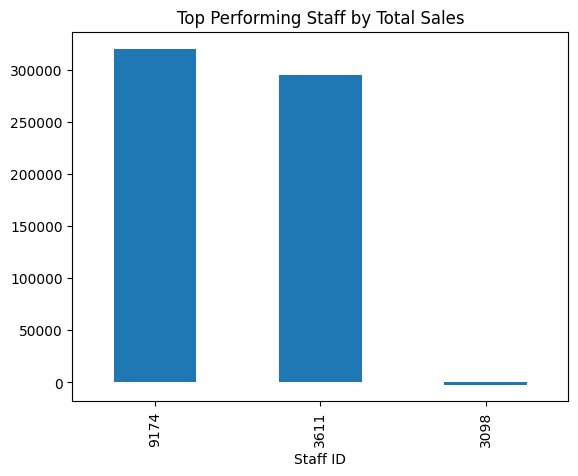

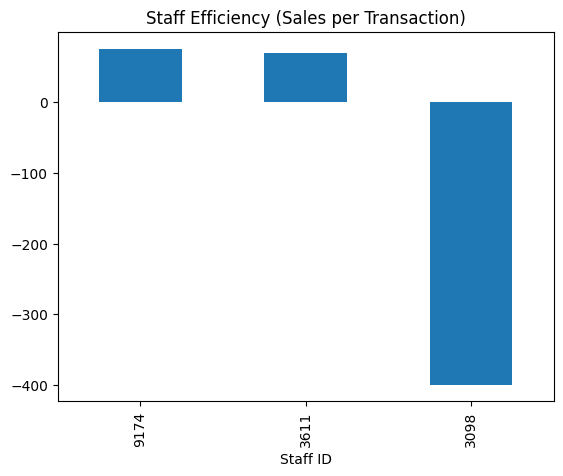

In [61]:
# Top Performing Staff by Total Sales
top_staff_sales = df.groupby('Staff ID')['Net Value'].sum().nlargest(10)
top_staff_sales.plot(kind='bar', title='Top Performing Staff by Total Sales')
plt.show()

# Staff Efficiency (Sales per Transaction)
staff_efficiency = df.groupby('Staff ID').agg({'Net Value': 'sum', 'Receipt Number': 'nunique'}).rename(columns={'Receipt Number': 'Transactions'})
staff_efficiency['Sales per Transaction'] = staff_efficiency['Net Value'] / staff_efficiency['Transactions']
staff_efficiency['Sales per Transaction'].nlargest(10).plot(kind='bar', title='Staff Efficiency (Sales per Transaction)')
plt.show()

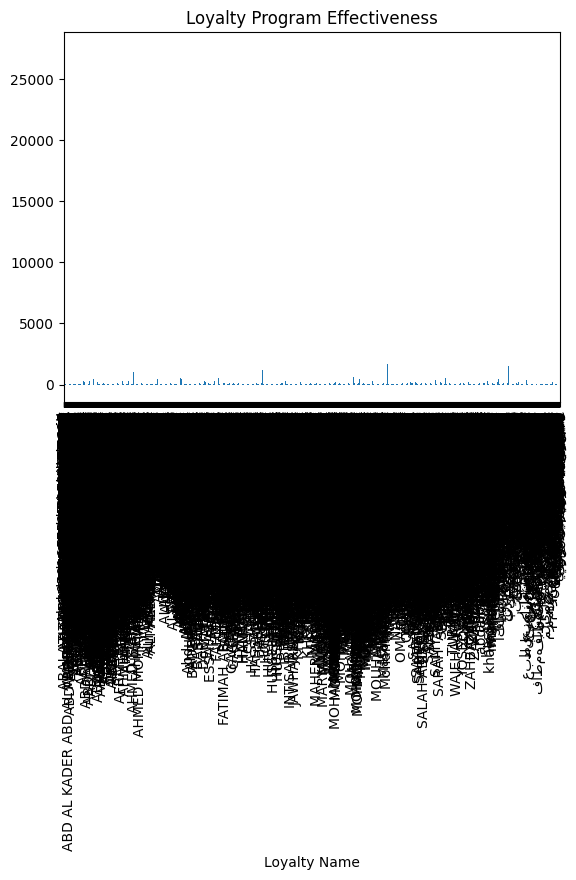

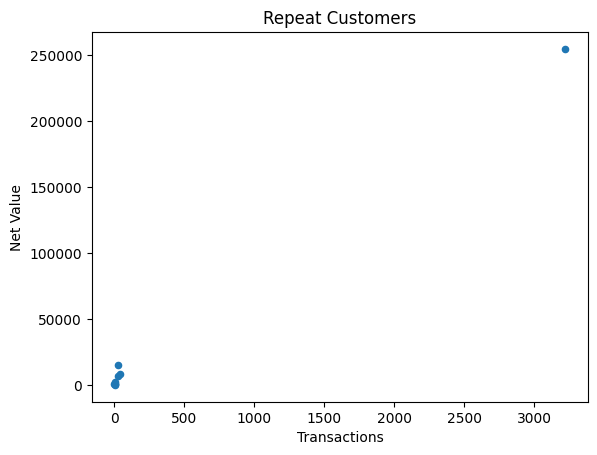

In [10]:
# Loyalty Program Effectiveness
loyalty_sales = df.groupby('Loyalty Name')['Net Value'].sum()
loyalty_sales.plot(kind='bar', title='Loyalty Program Effectiveness')
plt.show()

# Repeat Customers
repeat_customers = df.groupby('Customer Name').filter(lambda x: len(x) > 1)
repeat_customers_summary = repeat_customers.groupby('Customer Name').agg({'Net Value': 'sum', 'Receipt Number': 'nunique'}).rename(columns={'Receipt Number': 'Transactions'})
repeat_customers_summary.plot(kind='scatter', x='Transactions', y='Net Value', title='Repeat Customers')
plt.show()

/home/hasan/Documents/zoron/website/local/myenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


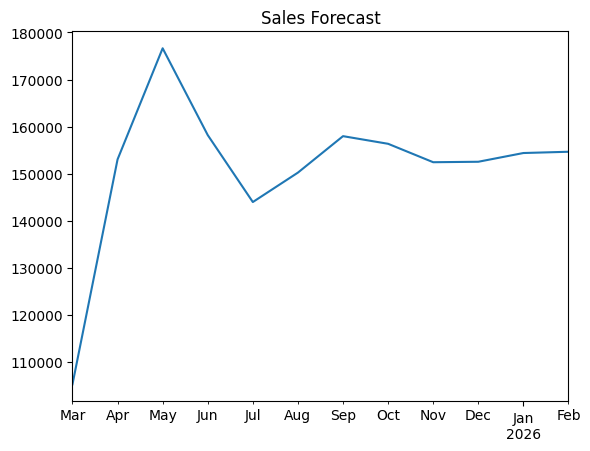

In [12]:
# Sales Forecasting (Example using ARIMA)
from statsmodels.tsa.arima.model import ARIMA

monthly_sales = df.resample('ME', on='Trx Date')['Net Value'].sum()
model = ARIMA(monthly_sales, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
forecast.plot(title='Sales Forecast')
plt.show()

Location                    0
Machine Code                0
Receipt Number              0
Order No                 8463
DeliveryNo               8444
Trx Month                   0
Trx Date                    0
Trx Time                    0
Trx Type                    0
Trx Status                  0
Document Type               0
Sub Document Type           0
Staff ID                    0
Staff Name                  0
Staff Phone                 0
Customer ID              5194
Customer Name            5194
Membership ID            5149
Loyalty Customer ID       615
Loyalty Name              708
Loyalty Phone             617
Is Dawaa Insurance          0
Is Insurance Approval       0
Insurance Approval       5206
Insurance Type           8552
Nphies Action Type          0
Nphies Member Id         8423
Nphies Payer Code        8423
Nphies Auth Id           8423
Indirect Customer        8548
Gender                   8552
Nationality              8552
Items                       0
Item Lines

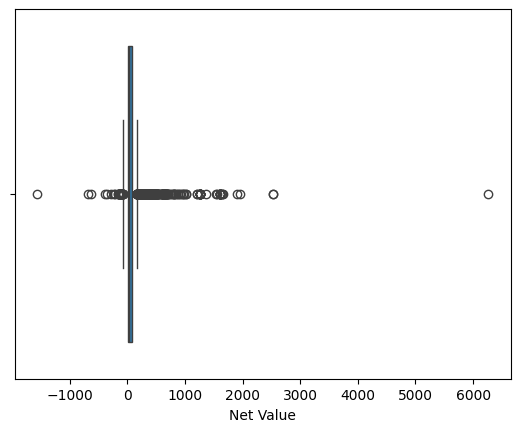

In [13]:
# Missing Data Check
missing_data = df.isnull().sum()
print(missing_data)

# Outlier Detection
import seaborn as sns

sns.boxplot(x=df['Net Value'])
plt.show()